In [1]:
from Discriminamometro import Utileria, Discriminamometro
import pandas as pd
import spacy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier


nlp = spacy.load('./data/embeddings_disc/')
# Se instancia la clase del Discriminamometro
obj_Discr = Discriminamometro('PRUEBA')

# Mostramos la cantidad de tweets
print(obj_Discr.nbr_TweetsXCorrida)

8


In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import os

In [3]:
def Correr_Magic_Loop( npClassifier, npDictHyperParams, X_train, Y_train, nbrCv, strScoring):

        npResultados = np.array([])
        for i, classifier in enumerate(npClassifier):
            dictHyperParams = npDictHyperParams[i]
            grid_search = GridSearchCV(classifier,
                                       dictHyperParams,
                                       scoring=strScoring,
                                       cv=nbrCv,
                                       n_jobs=-1,
                                       verbose=3
                                       )
            grid_search.fit(X_train, Y_train)
            npResultados = np.append(npResultados, grid_search)

            # de los valores posibles que pusimos en el grid, cuáles fueron los mejores
            print('grid_search.best_params_: ', grid_search.best_params_)

            # mejor score asociado a los modelos generados con los diferentes hiperparametros
            # corresponde al promedio de los scores generados con los cv
            print('grid_search.best_score_: ', grid_search.best_score_)

            best_model = grid_search.best_estimator_


        return best_model, npResultados

In [4]:
def Prep_Modelos(npModelos):

    npArrayModelos = np.array([])
    for strModelo in npModelos:

        if strModelo == 'DECTREE':
            classifier = tree.DecisionTreeClassifier()
        if strModelo == 'RANDOMF':
            classifier = RandomForestClassifier()
        if strModelo == 'XGBOOST':
            classifier = GradientBoostingClassifier()

        npArrayModelos = np.append(npArrayModelos, classifier)

    return npArrayModelos

In [5]:
npDictHiperParam = np.array([]) 
# Parametrización para Árboles
dictHyperParams = {'max_depth': [4],#,7],  # 
                   'min_samples_split': [4],#,16],  # 
                   'min_samples_leaf': [3],#,7],  # 
                   'max_features': ['sqrt'],#,'log2']  # 
                   }
npDictHiperParam = np.append(npDictHiperParam, dictHyperParams)

# Parametrización para Bosques
dictHyperParams = {'n_estimators': [50],  # Se redujo a 50
                   'max_depth': [4,7],  # 
                   'max_features': ['sqrt'], #,'log2'],
                   'min_samples_split': [4], #16],
                   'min_samples_leaf': [3] #
                   }
npDictHiperParam = np.append(npDictHiperParam, dictHyperParams)

# Parametrización para XGBoost
dictHyperParams = {'learning_rate': [0.1,0.25],#, 0.75],
                   'n_estimators': [50],#,100,150],  # Se redujo a 50
                   'min_samples_split': [4],#16],
                   'min_samples_leaf': [3],#,7],
                   'max_depth': [5],# 3,4,6,7,10,15],
                   'max_features': ['sqrt']#,'log2']
                   }
npDictHiperParam = np.append(npDictHiperParam, dictHyperParams)

# Se crean los modelos de clasificaión que se emplearán (en el mismo orden que los diccionarios)
npNombreModelos = np.array([])
npNombreModelos = np.append(npNombreModelos, 'DECTREE')
npNombreModelos = np.append(npNombreModelos, 'RANDOMF')
npNombreModelos = np.append(npNombreModelos, 'XGBOOST')

In [6]:
data = pd.read_csv("tweets_julio_embeddings.csv")
data

/home/francisco/anaconda3/envs/discriminamometro/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,full_text,categoria
0,0,"!Viva la ""diversidad""! [?] \n\n!Proximamente e...",apariencia
1,1,@tennissucios @TenochHuerta Jajajaja... Muy ac...,apariencia
2,3,Hay momentos de la vida en los que te das cue...,apariencia
3,4,@hornyboysmex @Hombres_sexgay Hermoso guerito !,apariencia
4,5,Que restriccion tiene @DrGiammattei preparado ...,apariencia
...,...,...,...
3160328,360,@tamairycabrera Esa fue tu cara. https://t.co/...,neutro
3160329,361,no me voy a cansar de felicitar a todos los qu...,neutro
3160330,362,@CESARRRASCON Se mueren porque se encuentre al...,neutro
3160331,363,Las ganas son grandes bruh,neutro


In [7]:
class_names = ['1-ap','2-dis','3-ed', '4-gen',
               '5-id', '6-or', '7-rel', '8-neu']

data["categoria"] = data["categoria"].replace(['apariencia'],'1-ap')
data["categoria"] = data["categoria"].replace(['discapacidad'],'2-dis')
data["categoria"] = data["categoria"].replace(['edad'],'3-ed')
data["categoria"] = data["categoria"].replace(['genero'],'4-gen')
data["categoria"] = data["categoria"].replace(['ideologia'],'5-id')
data["categoria"] = data["categoria"].replace(['orientacion'],'6-or')
data["categoria"] = data["categoria"].replace(['religion'],'7-rel')
data["categoria"] = data["categoria"].replace(['neutro'],'8-neu')
data

,Unnamed: 0,full_text,categoria
0,0,"!Viva la ""diversidad""! [?] \n\n!Proximamente e...",1-ap
1,1,@tennissucios @TenochHuerta Jajajaja... Muy ac...,1-ap
2,3,Hay momentos de la vida en los que te das cue...,1-ap
3,4,@hornyboysmex @Hombres_sexgay Hermoso guerito !,1-ap
4,5,Que restriccion tiene @DrGiammattei preparado ...,1-ap
...,...,...,...
3160328,360,@tamairycabrera Esa fue tu cara. https://t.co/...,8-neu
3160329,361,no me voy a cansar de felicitar a todos los qu...,8-neu
3160330,362,@CESARRRASCON Se mueren porque se encuentre al...,8-neu
3160331,363,Las ganas son grandes bruh,8-neu


In [24]:
data['categoria'].value_counts()

8-neu    714821
4-gen    170274
6-or      85207
5-id      28998
1-ap      26987
2-dis     19956
3-ed       5583
7-rel      1772
Name: categoria, dtype: int64

In [25]:
data = data[data["categoria"].isnull()==False]
data

,Unnamed: 0,full_text,categoria
0,0,"!Viva la ""diversidad""! [?] \n\n!Proximamente e...",1-ap
1,1,@tennissucios @TenochHuerta Jajajaja... Muy ac...,1-ap
2,3,Hay momentos de la vida en los que te das cue...,1-ap
3,4,@hornyboysmex @Hombres_sexgay Hermoso guerito !,1-ap
4,5,Que restriccion tiene @DrGiammattei preparado ...,1-ap
...,...,...,...
3160328,360,@tamairycabrera Esa fue tu cara. https://t.co/...,8-neu
3160329,361,no me voy a cansar de felicitar a todos los qu...,8-neu
3160330,362,@CESARRRASCON Se mueren porque se encuentre al...,8-neu
3160331,363,Las ganas son grandes bruh,8-neu


In [30]:
data = pd.get_dummies(data,columns= ['categoria'])

In [31]:
data

,Unnamed: 0,full_text,categoria_1-ap,categoria_2-dis,categoria_3-ed,categoria_4-gen,categoria_5-id,categoria_6-or,categoria_7-rel,categoria_8-neu
0,0,"!Viva la ""diversidad""! [?] \n\n!Proximamente e...",1,0,0,0,0,0,0,0
1,1,@tennissucios @TenochHuerta Jajajaja... Muy ac...,1,0,0,0,0,0,0,0
2,3,Hay momentos de la vida en los que te das cue...,1,0,0,0,0,0,0,0
3,4,@hornyboysmex @Hombres_sexgay Hermoso guerito !,1,0,0,0,0,0,0,0
4,5,Que restriccion tiene @DrGiammattei preparado ...,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3160328,360,@tamairycabrera Esa fue tu cara. https://t.co/...,0,0,0,0,0,0,0,1
3160329,361,no me voy a cansar de felicitar a todos los qu...,0,0,0,0,0,0,0,1
3160330,362,@CESARRRASCON Se mueren porque se encuentre al...,0,0,0,0,0,0,0,1
3160331,363,Las ganas son grandes bruh,0,0,0,0,0,0,0,1


In [32]:
obj_Discr.str_StopWords='StopWords.p'
obj_Discr.CargarStopWords()

data = obj_Discr.LimpiarDataFrame(data)
data = obj_Discr.QuitarStopWordsDataFrame(data)

In [33]:
#data.to_csv('matriz_entrenamiento_todas_categorias.csv')

In [6]:
data = pd.read_csv('matriz_entrenamiento_todas_categorias.csv')

In [7]:
data = data.drop(['Unnamed: 0','Unnamed: 0.1', 'categoria_8-neu'], axis = 1)
data

,full_text,categoria_1-ap,categoria_2-dis,categoria_3-ed,categoria_4-gen,categoria_5-id,categoria_6-or,categoria_7-rel
0,[] proximamente rd jodido el4tobate,1,0,0,0,0,0,0
1,jajajaja acomplejado guerito rockero ja facil ...,1,0,0,0,0,0,0
2,momentos cuenta contados dedos personas sincer...,1,0,0,0,0,0,0
3,guerito,1,0,0,0,0,0,0
4,restriccion preparado casos covid-19 suben 15 ...,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1053593,NaN,0,0,0,0,0,0,0
1053594,voy cansar felicitar,0,0,0,0,0,0,0
1053595,mueren encuentre oscuro quedar ganas,0,0,0,0,0,0,0
1053596,ganas bruh,0,0,0,0,0,0,0


In [8]:
data = data[data["full_text"].isnull()==False]

In [9]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.iloc[0:1000]
data

,full_text,categoria_1-ap,categoria_2-dis,categoria_3-ed,categoria_4-gen,categoria_5-id,categoria_6-or,categoria_7-rel
592879,ejemplos sanadistancia escuelas tailandia evit...,0,0,0,0,0,0,0
213812,vergonzoso justifica violencia asquerosa numer...,0,0,0,1,0,0,0
267511,tabien joto,0,0,0,0,0,1,0
981516,etiqueto mamada conmigo jajajajajaja,0,0,0,0,0,0,0
299460,puto estres esperando pendejo mensaje,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
372805,melcochita - maguey salsamexico salsaparatodos,0,0,0,0,0,0,0
725435,vigilante heroe apoyo,0,0,0,0,0,0,0
847642,video cjng,0,0,0,0,0,0,0
13565,peor entregarle tiempo siquiera disfrutando ti...,1,0,0,0,0,0,0


In [10]:
data['categoria_4-gen'].value_counts()

0    821
1    179
Name: categoria_4-gen, dtype: int64

In [11]:
train, test = train_test_split(data, test_size=0.2,random_state = 202008)

In [12]:
npEmbeddings = np.empty([0, 300])

for texto in train['full_text']:
    
    #print(texto)
    
    # process a sentence using the model
    doc = nlp(texto)
    
    # print(doc.vector.shape)
    if doc.vector.shape[0]==300:
        npEmbeddings = np.append(npEmbeddings, [doc.vector], axis = 0)
    else:
        npAux = np.empty([1, 300])
        npEmbeddings = np.append(npEmbeddings, npAux, axis = 0)

npEmbeddings.shape

(800, 300)

In [13]:
X_train = pd.DataFrame(npEmbeddings)
Y_train = pd.DataFrame(train['categoria_4-gen'])
arrModelos = Prep_Modelos(npNombreModelos)

# #Se corre el magic loop para realizar las predicciones con los parámetros previamente establecidos
best_model,npGridSearchCv = Correr_Magic_Loop(arrModelos,
                                    npDictHiperParam,
                                    X_train,
                                    Y_train,
                                    5,
                                    'roc_auc')

npArrBestScores = np.array([])
npArrBestParams = np.array([])

# Barremos el arreglo de GridSearchCV´s para sacar los mejores scores y parámetros
for grid in npGridSearchCv:
    npArrBestScores = np.append(npArrBestScores, grid.best_score_)
    npArrBestParams = np.append(npArrBestParams, grid.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


grid_search.best_params_:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4}
grid_search.best_score_:  0.7594718714121699
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished
/home/francisco/anaconda3/envs/discriminamometro/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


grid_search.best_params_:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 50}
grid_search.best_score_:  0.938691159586682
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
/home/francisco/anaconda3/envs/discriminamometro/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grid_search.best_params_:  {'learning_rate': 0.25, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 50}
grid_search.best_score_:  0.9676808266360505


In [14]:
# Obtenemos el índice del mejor score
nbrIndiceGanador = np.argmax(npArrBestScores, axis=0)

# Mostramos el modelo, parámetros y score ganador
# print("Modelo ganador: \n", arrModelos[nbrIndiceGanador])
# print("Score del modelo ganador: \n", npArrBestScores[nbrIndiceGanador])
# print("Parametros del modelo ganador: \n", npArrBestParams[nbrIndiceGanador])

# Se instancia el modelo ganador
# self.ModeloGanadorMagicLoop = objEda.InstanciarModeloDinamico(npNombreModelos, nbrIndiceGanador, npArrBestParams[nbrIndiceGanador])
ModeloGanadorMagicLoop = best_model
ModeloGanadorMagicLoop

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=5,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
npEmbeddings2 = np.empty([0, 300])
for texto in test['full_text']:
    
    #print(frase)
    
    # process a sentence using the model
    doc = nlp(texto)
    
    # print(doc.vector.shape)
    #print(npEmbeddings.shape)
    #print(doc.vector.shape)
    
    if doc.vector.shape[0]==300:
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
    else:
        npAux = np.empty([1, 300])
        doc = nlp('prueba')
        #npEmbeddings = np.append(npEmbeddings, npAux, axis = 0)
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
        predicted_svm = clf.predict([doc.vector])
        
npEmbeddings2.shape

(200, 300)

In [17]:
predicted_svm = best_model.predict(npEmbeddings2)
np.mean(predicted_svm == test['categoria_4-gen'])

0.945

In [19]:
y_probas = best_model.predict_proba(npEmbeddings2)
y_true = test['categoria_4-gen']
y_prob = pd.DataFrame(y_probas)
y_prob.columns = ["cero","uno"]
y_prob = y_prob["uno"]

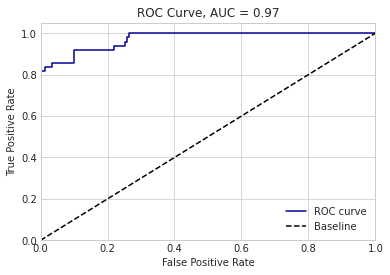

In [20]:
from sklearn import metrics
from matplotlib import pyplot as plt 

#Definimos la funcion que graficará la ROC
def plot_ROC(test_labels, test_predictions):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, 
                                             test_predictions, pos_label=1)
    auc = "%.2f" % metrics.auc(fpr, tpr)
    title = 'ROC Curve, AUC = '+str(auc)
    with plt.style.context(('seaborn-whitegrid')):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "#000099", label='ROC curve')
        ax.plot([0, 1], [0, 1], 'k--', label='Baseline')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.title(title)
    return  
plot_ROC(y_true, y_prob) 

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_true, predicted_svm)

array([[151,   0],
       [ 11,  38]])

Confusion matrix, without normalization
[[151   0]
 [ 11  38]]
Normalized confusion matrix
[[1.        0.       ]
 [0.2244898 0.7755102]]


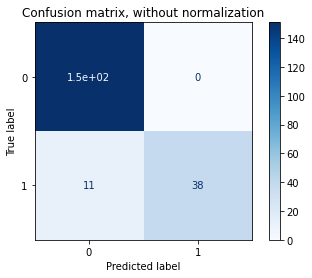

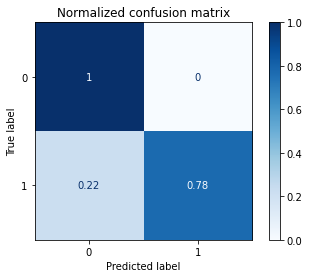

In [23]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_model, npEmbeddings2, y_true,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()